# Analysis on US Adult Income in 1994

## Investigation Overview

Income is a important metric to understand the development of national society and people's livelihood. According to Federal Reserve Bank of St. Louis. U.S. Bureau of Economic Analysis, US per-capita disposable income was $45,646 as of October 2019 in 2012 dollars. But how does the income metric look like back in 15 years ago? Exploring the income facts in 1994 would be a interesting topic to understand the development of livelihood through the one-and-a-half decade.

In this investigation, I will use a dataset featuring adult demographic information and income group (high-income group with salary > 50K and low-income group with salary <50K). I am going to reveal the most important features predictable of people's income group and explore some facts related to gender and race discrimination.

## Dataset Overview

The data I use is __1994 Adult Census Income Data__ from [Kaggle](https://www.kaggle.com/uciml/adult-census-income), extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

The data consisted of 32560 observations. It contains demographic information of adults including `age`, `workclass`, `education`, etc., and other investment information like `capital-gain` and `capital-loss`. Including the dependant variable `income`, this dataset has 15 columns in total, 6 of them are numerical, the left are categorical.

For the purpose of interpretation and model building, the dataset has been mangled by dropping empty values and merging minor levels in categorical columns, etc.，The visualizations and analysis are costructed upon the 12 columns of clean data with 30K+ observations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
income_clean = pd.read_csv('income_clean.csv')

## The Distribution of Income in 1994

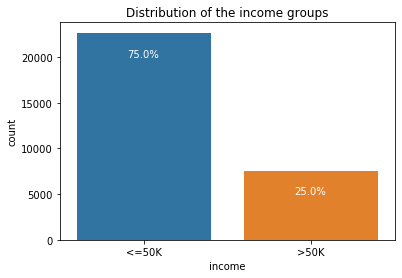

In [97]:
# start from distribution of income
plt
sns.countplot(x = 'income', data = income_clean)
plt.title('Distribution of the income groups')
plt.text(-0.1, 20000, str(round(len(income_clean[income_clean.income == '<=50K'])/len(income_clean), 2)*100) + '%', color = 'w')
plt.text(0.9, 5000, str(round(len(income_clean[income_clean.income == '>50K'])/len(income_clean), 2)*100) + '%', color = 'w')
# Most people in US at that time has less than <= 50k salary
plt.show()

In 1994, If you earn more than 50K income. Then congratulations, you are in the 25% of highest-income people in US. As we can see from the barplot below, the majority of US citizens (75%) couldn't make it to 50K income. 

But what caused people to earn so differently? While the causation is hard to answer, we can certainly look into patterns of demoraphic information to see how do people in different income groups look like.

To get you on board with the context of these demographic information, please check the plots below:
- Age: The majority of people's age are under the range of 20 to 50. Most are near 40.
- Eduaction Level: Most people have 9-10 or 13 years of education, corresponding to High School, Some-college and Bachelors;
- Working Hours: The majority worked around 40 hours a week.

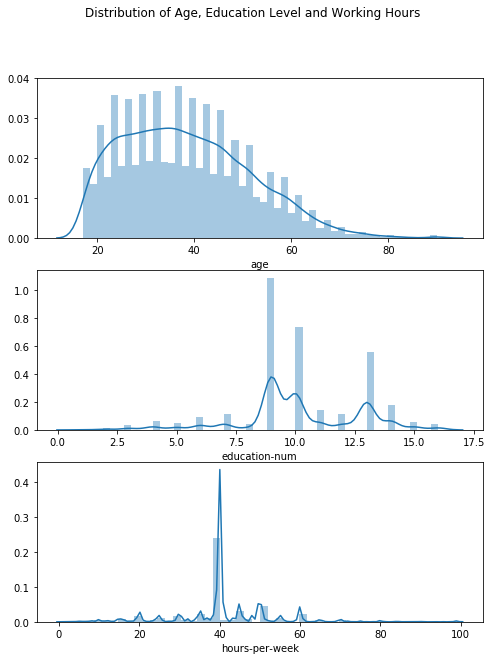

In [89]:

fig, ax = plt.subplots(nrows=3, figsize = [8,10])

default_color = sns.color_palette()[0]
sns.distplot(income_clean.age, ax = ax[0])
sns.distplot(income_clean['hours-per-week'], ax = ax[2])
sns.distplot(income_clean['education-num'], ax = ax[1])
plt.suptitle('Distribution of Age, Education Level and Working Hours')
plt.show()

- Sex: Only 10k female participated in this census while 20k male participated;
- Race: White takes nearly 5/6 of the dataset

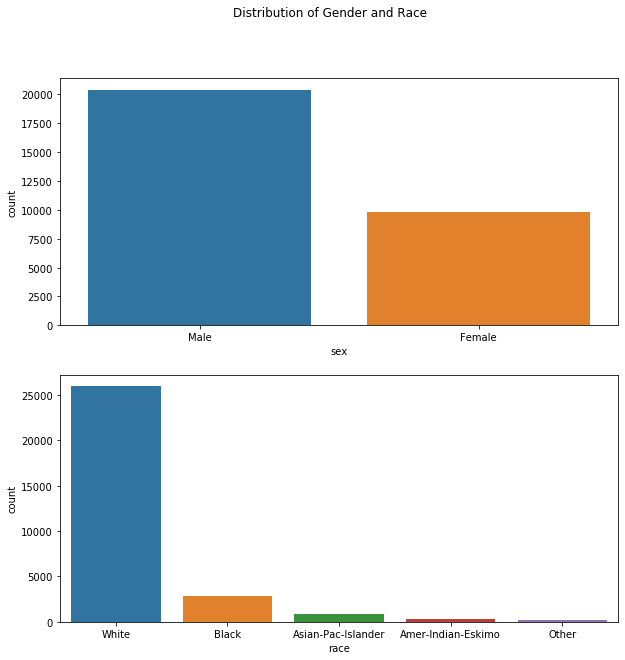

In [88]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
sns.countplot(income_clean.sex, ax = ax[0])
sns.countplot(income_clean.race, ax = ax[1])
plt.suptitle('Distribution of Gender and Race')
plt.show()

## People who earn more tend to have more experience/learn/work

The significant numerical values that can be used to predict income data are: __adult age__, __eduaction level__, __working hours per week__. Interestingly, looking at the boxplots below, you can see that these trend echos with the sentence form of _'The more ... The more ...'_. On average, higher income group has larger age, which can be interpretated as more experience, higher education level and more working hours. 

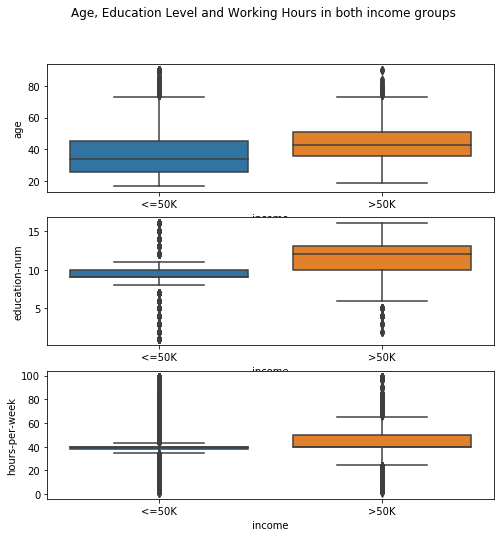

In [56]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.boxplot(y="age", x="income", data=income_clean, ax = ax[0])
sns.boxplot(y="education-num", x="income", data=income_clean, ax = ax[1])
sns.boxplot(y="hours-per-week", x="income", data=income_clean, ax = ax[2])
plt.suptitle('Age, Education Level and Working Hours in both income groups')
plt.show()

The statement of _'The more... The more...'_ is even truer for education level. The plot below shows the proportion of both incomr groups in different education levels, you can clearly observe that, with the increase of years of education received, more proportion of people entered into the '>50K ' group.

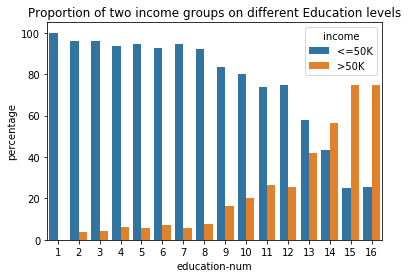

In [96]:
income_counts = (income_clean.groupby(['education-num'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(x="education-num", y="percentage", hue="income", data=income_counts)
plt.title('Proportion of two income groups on different Education levels')
plt.show()
# From the barplot picturing proportion information, 
# we can see that longer education-num has larger proportion of people who earn more than 50K

## Potential discriminations in sex and race?

The most significant categorical values are: __sex__ and __race__.

__Analysis on sex against income groups__

Since male takes the majority of this dataset, I used proportion data to look into the relationship between sex and income. Obviously, only about 15% of female has income greater than 50K, while 30% male were in that group.

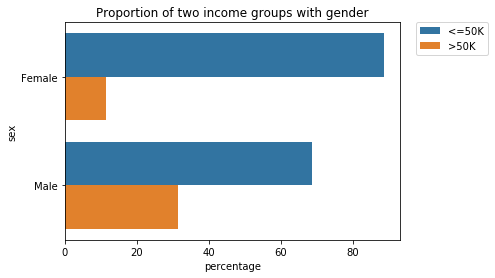

In [95]:
income_counts = (income_clean.groupby(['sex'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(y="sex", x="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Proportion of two income groups with gender')
plt.show()
# People who work as executive managers, in protective service or have professional specialties tend to earn more.

__Analysis on race against income groups__

Same as in analysis above. I investigated in the proportions of income group in different races. Obviously, White and Asian-Pac-Islander have similar high proportion of >= 50K (around 30%); with Amer-Indian-Eskimo and Black have similar lower proportion of >=50K (around 15%), and Other minorities have least proportion of >=50K.

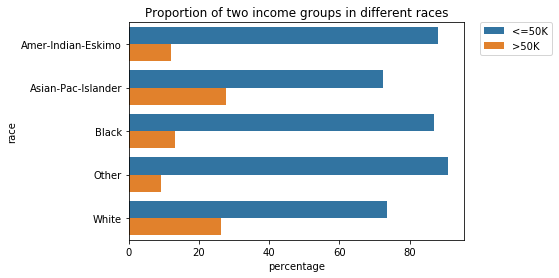

In [94]:
income_counts = (income_clean.groupby(['race'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(y="race", x="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Proportion of two income groups in different races')
plt.show()
# People who work as executive managers, in protective service or have professional specialties tend to earn more.

## The answer: Yes. There were Discrimination.

The insights from the visualizations above suggest potential discriminations in working siituations. To analyze whether the interactions really exist, I need to dig deeper in the interaction effects related to these two features.

__Gender Discrimination__

One obvious interaction for agender is in working hours. As the significant interaction plots shown below, generally, females are discriminated in hours-per-week as their working-hours are on average nearly 10 hours fewer than males', which might be the cause of an overall lower proportion of higher income in female. Notably, the workhours discriminations doesn't disappear until Doctorate eduction level.

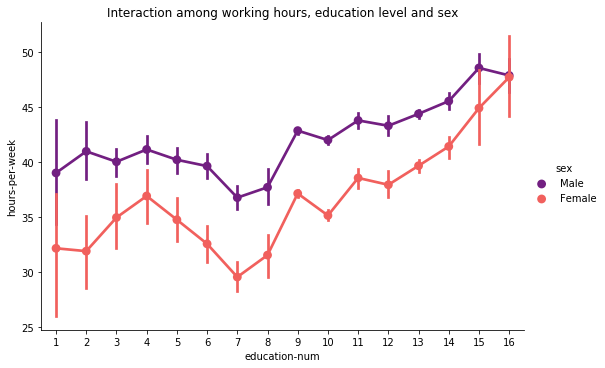

In [93]:
sns.catplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', palette = 'magma', kind = 'point', data = income_clean, height=5, aspect=1.5)
plt.title('Interaction among working hours, education level and sex')
plt.show()
# As the significant interaction plots shown below, for example, 
# Generally, females are discriminated in hours-per-week
# the workhours discriminations doesdn't disappear until Doctorate eduction level

But this discrimination will change across workclasses, we could see that discrimnation are most severe in Private workclase, least severe in Government workclase. 

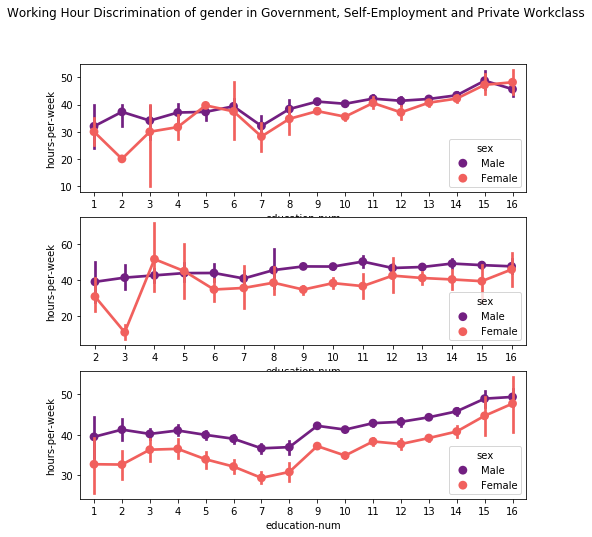

In [92]:
# Check for Government, Self_Employed and Private

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', palette = 'magma', data = income_clean[income_clean.workclass == 'Government'], ax = ax[0])
sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', palette = 'magma',  data = income_clean[income_clean.workclass == 'Self_Employed'], ax = ax[1])
sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', palette = 'magma',  data = income_clean[income_clean.workclass == 'Private'], ax = ax[2])
plt.suptitle('Working Hour Discrimination of gender in Government, Self-Employment and Private Workclass')
plt.show()

# It shows that female working hours-per-week are least discriminated in Government, followed by Self-Employed, then Private  

__Race Discrimination__

The similar working-hour discrimination also exists in different races and in different workclasses: For government and self-employed workclasses, the average trend is that: The more hours you work, the higher probability you are in the >50K group,
However, for minorities, the relationship is reversed. As a minority, if you work longer, you are more likely to earn less.

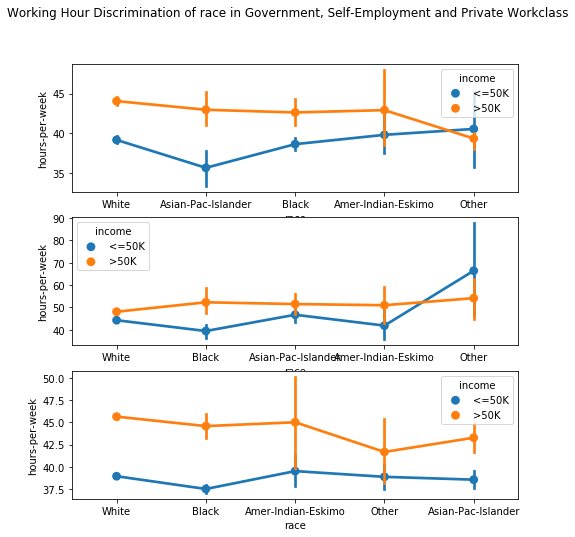

In [91]:
# Check for the situations in Government, Self_Employed and Private

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income',data = income_clean[income_clean.workclass == 'Government'], ax = ax[0])
sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income',data = income_clean[income_clean.workclass == 'Self_Employed'], ax = ax[1])
sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income',data = income_clean[income_clean.workclass == 'Private'], ax = ax[2])
plt.suptitle('Working Hour Discrimination of race in Government, Self-Employment and Private Workclass')
plt.show()

# When we break the analysis into different workclasses
# We can see the interaction effect of races and hours0per-week in income
# For government and self-employed workclasses, the average trend is that: 
# The more hours you work, the higher probability you are in the >50K group,
# However, for minorities, the relationship is reversed.

## Conclusion
In this investigation, I revealed the most important features predictable of people's income group like education level, working hours and found related discrimination for race and gender, especially in discrimination in working hours.